# Classifying Movie Genres Based on the Title and Plot

Cameron Wonchoba

Andrew Leo

Tou Yang

# Overview

Movies are put into categories called `genres`. These genres describe the expectations that a person should have when they watch the movie.

We are given a data set that maps each movie title and their plot to the genre they are in. Using Natural Language Processing, we will identify what genre the movie is based on the title and plot. 

Developing a tool that can accurately identify these genres based on the genre and plot may help movie creators effectively write a movie title and generic plot. Once they create their title and plot, they could pass it into this model and verify that it conveys the message that they intend.

This is a multiclass classification problem that will utilize Natural Language Processing.

## What is Natural Language Processing?

Natural Language processing allows computers to analyze and understand human written language. Ultimately, we want to be able to parse the natural language in a way that is valuable. 

There are two parts of a language that the computer needs to be able to understand:

### Syntax
Syntax describes the way we arrange words to make a sentence that is grammatically correct. Syntax is important to help the computer learn the structure of our language. It helps to learn if each sentence is grammatically correct or not. 

### Semantics
Semantics describes the meaning behind each word, sentence or phrase. Semantics are important to help the computer understand the meaning behind indiviudal words and combination of words. This becomes difficult when words have more than one meaning. For example:

1. I crashed my car.
2. I crashed on my couch.

Here, the word "crashed" have different meanings. 

In the first example, "crashed" means destroyed or ruined.

In the second example, "crashed" means sleep.

Helping a computer understand these subtle differences in meaning can be difficult to do.

## Techniques/Libraries to Used in NLP
Below is a list of libraries and tools that may help us in the project.

1. Natural Language Toolkit (NLTK)
    * https://www.nltk.org/
    * Slow and steep learning curve 
2. TextBlob
    * https://textblob.readthedocs.io/en/dev/
    * Easy to learn (great for beginners!), but it is slow
3. CoreNLP
    * https://stanfordnlp.github.io/CoreNLP/
    * Really fast and can be integrated with NLTK
4. Gensim
    * https://github.com/RaRe-Technologies/gensim
    * Specializes in semantic recognition
5. spaCy
    * https://spacy.io/
    * Really fast! Only supports 7 languages (Python is one of them, so we're good).
6. polyglot
    * https://polyglot.readthedocs.io/en/latest/index.html
    * Similar performance to spaCy but supports more languages.
7. scikit–learn
    * https://scikit-learn.org/stable/
    * Great documentation and familiar. Does not use Neural Networks for processing, so it isn't as good.
8. Pattern
    * https://www.clips.uantwerpen.be/pages/pattern
    * Good for webmining, but doesn't include enough NLP tasks


Sources:

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://sunscrapers.com/blog/8-best-python-natural-language-processing-nlp-libraries/

# Topic Modeling
Here we are going to do a form of topic modeling. Topic Modeling is trying to understand the topic of a piece of text. In our case, the topic can be defined as the genre. We will try to figure out the genre of the movie (topic).

# Data

The data set that we are using can be found here: https://github.com/davidsbatista/text-classification/blob/master/movies_genres.csv.bz2

This data set includes the title, plot and genre of 117,352 movies. The genres that are included in this data set are:
* Action
* Adult 
* Adventure
* Animation
* Biography
* Comedy
* Crime
* Documentary
* Drama
* Family
* Fantasy
* Game-Show
* History
* Horror
* Lifestyle
* Music
* Musical
* Mystery
* News
* Reality-TV
* Romance
* Sci-Fi
* Short
* Sport
* Talk-Show
* Thriller
* War
* Western

> NOTE: Each movie is mapped to only one genre. In practice, it may be the case that movies are mapped to more than one genre.

In [ ]:
import pandas as pd
import numpy as np
import time
pd.set_option('display.max_columns', None)

In [2]:
path_to_data = "../data/movies_genres.csv"
movies = pd.read_csv(path_to_data, delimiter='\t')

In [3]:
movies.head(3)

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)

sum_frame_by_column(movies, 'genre_sum', ['Action','Adult','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Game-Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Talk-Show','Thriller','War','Western'])

print("Movie Count prior to dropping rows: ", movies.shape[0])

movies = movies[movies.genre_sum == 1]
    
print("Movie Count after dropping rows: ", movies.shape[0])

Movie Count prior to dropping rows:  47827
Movie Count after dropping rows:  47827


In [12]:
def get_genre(row):
    for c in movies.columns:
        if row[c] == 1:
            return c
        
movies['Genre'] = movies.apply(get_genre, axis=1)

movies['Genre'].head()

0        Comedy
1    Reality-TV
2    Reality-TV
3    Reality-TV
4    Reality-TV
Name: Genre, dtype: object

# Exploratory Data Analysis

In [13]:
import nltk
nltk.download('all') # This takes awhile

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\c

[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\chosb\AppData\Roamin

[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is 

True

In [14]:
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns.")

There are 47827 rows and 32 columns.


Comedy         10925
Reality-TV      8284
Drama           7467
Documentary     6090
Talk-Show       2777
Western         1950
Animation       1663
Family          1611
News            1312
Music            743
Adventure        703
Sport            693
Crime            638
Romance          524
Game-Show        419
Sci-Fi           377
History          293
Horror           262
Mystery          240
Action           201
Thriller         178
Biography        164
Fantasy          128
Short             70
Adult             52
Musical           36
War               27
Name: Genre, dtype: int64


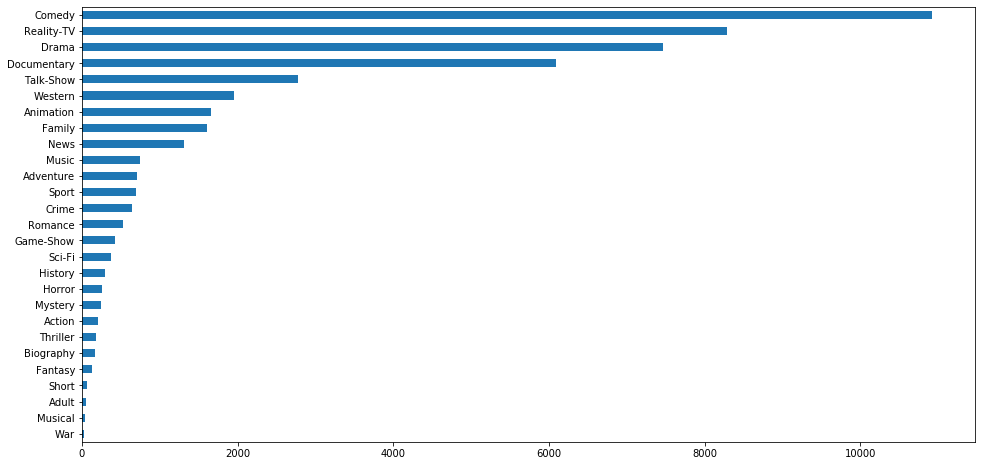

In [24]:
print(movies['Genre'].value_counts())

movies['Genre'].value_counts().sort_values().plot(kind = 'barh', figsize=(16,8))

The most common movie genres are:
* Comedy
* Reality-TV
* Drama
* Documentary

The least common movie genres are:
* War
* Musical
* Adult
* Short

There are 0 "lifestyle" movies. We can drop this column.

In [26]:
movies = movies.drop(columns=['Lifestyle'], axis=1)

KeyError: "['Lifestyle'] not found in axis"

Are there any weird values in the table?

In [27]:
movies.isnull().any()

title          False
plot           False
Action         False
Adult          False
Adventure      False
Animation      False
Biography      False
Comedy         False
Crime          False
Documentary    False
Drama          False
Family         False
Fantasy        False
Game-Show      False
History        False
Horror         False
Music          False
Musical        False
Mystery        False
News           False
Reality-TV     False
Romance        False
Sci-Fi         False
Short          False
Sport          False
Talk-Show      False
Thriller       False
War            False
Western        False
genre_sum      False
Genre          False
dtype: bool

All values exist

## Lets look at the actual titles and plots

In [28]:
movies['title']

0                                      "#7DaysLater" (2013)
1              "#BlackLove" (2015) {Crash the Party (#1.9)}
2         "#BlackLove" (2015) {Making Lemonade Out of Le...
3             "#BlackLove" (2015) {Miss Independent (#1.5)}
4            "#BlackLove" (2015) {Sealing the Deal (#1.10)}
                                ...                        
117343            "Öyle Bir Geçer Zaman ki" (2010) {(#1.1)}
117344           "Öyle Bir Geçer Zaman ki" (2010) {(#1.14)}
117345           "Öyle Bir Geçer Zaman ki" (2010) {(#1.16)}
117346            "Öyle Bir Geçer Zaman ki" (2010) {(#1.6)}
117351         "Über Österreich - Juwele des Landes" (2016)
Name: title, Length: 47827, dtype: object

Movie titles are surrounded by quotes. We will extract them using the following regular expression:

`"([^"]*)"`

In english, this regular expression can be read as:

Match everything that starts with quotes, contains anything that isn't a quote, followed by zero or more things, followed by a quote. 

In [29]:
# Lets extract the title name.
movies['Extracted Title'] = movies['title'].str.extract(r'"([^"]*)"')

# Now remove the first occurence of the '#' from the string.
movies['Extracted Title'] = movies['Extracted Title'].str.replace('#',"",1)

The year the title was made is surrounded by paranthesis. We will extract them using the following regular expression:

`\((.*?)\)`

In [30]:
movies['year'] = movies['title'].str.extract(r'\((.*?)\)')

It turns out that we also have tv shows in this data set. These can be discovered if there is some text surround by curly braces ({}). We can extract these by using the folloiwng regular expression:

`\{(.*?)\}`

We will then get rid of the episode number (these are defined by paranthesis).

`\(.*\)`

In [31]:
movies['Episode Info'] = movies['title'].str.extract(r'\{(.*?)\}')
movies['Episode Info'] = movies['Episode Info'].str.replace(r"\(.*\)","")

# Detecting languages
We should look at what languages we have. We should only deal with the english language for now.

We will detect the language of the plot. We choose the plot because it has the most words, and it is supposed to be grammatically correct. We can assume that they are grammatically correct as they are uploaded onto IMbD.

https://pypi.org/project/langdetect/

In [32]:
from langdetect import detect

# Apply the detect function for every row on the "plot" column.
# NOTE: This takes a while to complete.
movies['Language'] = movies.apply(lambda row : detect(row['plot']), axis=1)

In [33]:
movies['Language'].value_counts()

en    47790
nl       12
de       10
da        4
it        3
es        2
no        2
hu        1
fr        1
pt        1
sl        1
Name: Language, dtype: int64

There are some non-english movies in this set. Lets drop the rows that aren't english.

In [34]:
# Keep rows that are in english.
movies = movies[movies['Language'] == 'en']

# Reset the index as they are now messed up (due to the removal of rows)
movies = movies.reset_index()

movies['Language'].value_counts()

en    47790
Name: Language, dtype: int64

# Tokenization
Now we need to tokenize all of the words.

We are opting for the `TweetTokenizer` instead of word_tokenize because the word_tokenizer doesn't seem to handle apostophe's very well. For example:

Give the word `week's`

* word_tokenizer => ['week',"'s"]

* TweetTokenizer => ["week's"]

In [35]:
from nltk.tokenize import TweetTokenizer

start = time.time()

tokenizer = TweetTokenizer()

# For every plot, split it into its respective tokens.
movies["plot_tokens"] =  movies.apply(lambda row : tokenizer.tokenize(row['plot']), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  27.592975854873657


In [36]:
movies['plot'][0]

" #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms."

In [37]:
movies['plot_tokens'][0]

['#7dayslater',
 'is',
 'an',
 'interactive',
 'comedy',
 'series',
 'featuring',
 'an',
 'ensemble',
 'cast',
 'of',
 'YouTube',
 'celebrities',
 '.',
 'Each',
 'week',
 'the',
 'audience',
 'writes',
 'the',
 'brief',
 'via',
 'social',
 'media',
 'for',
 'an',
 'all-new',
 'episode',
 'featuring',
 'a',
 'well-known',
 'guest-star',
 '.',
 'Seven',
 'days',
 'later',
 'that',
 "week's",
 'episode',
 'premieres',
 'on',
 'TV',
 'and',
 'across',
 'multiple',
 'platforms',
 '.']

We now have our tokens for each row.

Lets extract these tokens into a list, and find the 20 most common tokens.

In [38]:
# I'm also curious as to how many total tokens we have

plot_tokens_lst = movies["plot_tokens"].tolist()

token_count = 0
for sentence in plot_tokens_lst:
    token_count += len(sentence)

print("Total Number of Tokens: ", token_count)

Total Number of Tokens:  4812389


In [39]:
from nltk.probability import FreqDist
fdist = FreqDist()

for sentence in plot_tokens_lst:
    for word in sentence:
        fdist[word.lower()]+=1
        
fdist.most_common(20)

[('the', 231559),
 ('.', 211975),
 (',', 193982),
 ('to', 144264),
 ('and', 136734),
 ('a', 126556),
 ('of', 89135),
 ('in', 69652),
 ('is', 60478),
 ('with', 47357),
 ('his', 42869),
 ('her', 41614),
 ('for', 40321),
 ('he', 35633),
 ('that', 34485),
 ('on', 33371),
 ('"', 31365),
 ('as', 26428),
 ('but', 24149),
 ('she', 23351)]

In [40]:
# How many unique tokens are there?
print(f"There are {len(fdist)} unique tokens.")

There are 111253 unique tokens.


These tokens seem uninformative... Lets clean up the tokens a bit by removing puncutation and stop noises.

# Removing Noise
Stemming works by cutting off the ends of the words. However, this doesn't always work. Sometimes it will convert a word into a word that is not technically it's root. 

Lemmatization will reduces each word to it's "true" root.

However, we also want to remove the noise (ie. stopwords). To do this, we will use the function that was seen in the In Class 11 exercise.

In addition to cleaning each string, we will also grab the pos_tag of each token and store it.

Originally from: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.tag import pos_tag

def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []

    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        lem_token = lemmatizer.lemmatize(token, pos)
        
        if len(lem_token) > 0 and lem_token not in string.punctuation and lem_token.lower() not in stop_words:
            cleaned_tokens.append(lem_token.lower())
            
    return cleaned_tokens

In [44]:
# NOTE: This code block takes about 25 minutes to run.
from nltk.corpus import stopwords

start = time.time()

movies['plot_tokens_cleaned'] = movies.apply(lambda row : remove_noise(row['plot_tokens'], stopwords.words('english')), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  396.293420791626


## How many unique Tokens do we have?

In [45]:
flat_list = [item for sublist in movies['plot_tokens_cleaned'].tolist() for item in sublist]
print(f"There are {len(set(flat_list))} unique tokens")

There are 103565 unique tokens


# Exploring Word Density
We can look at the most common words within each genre.

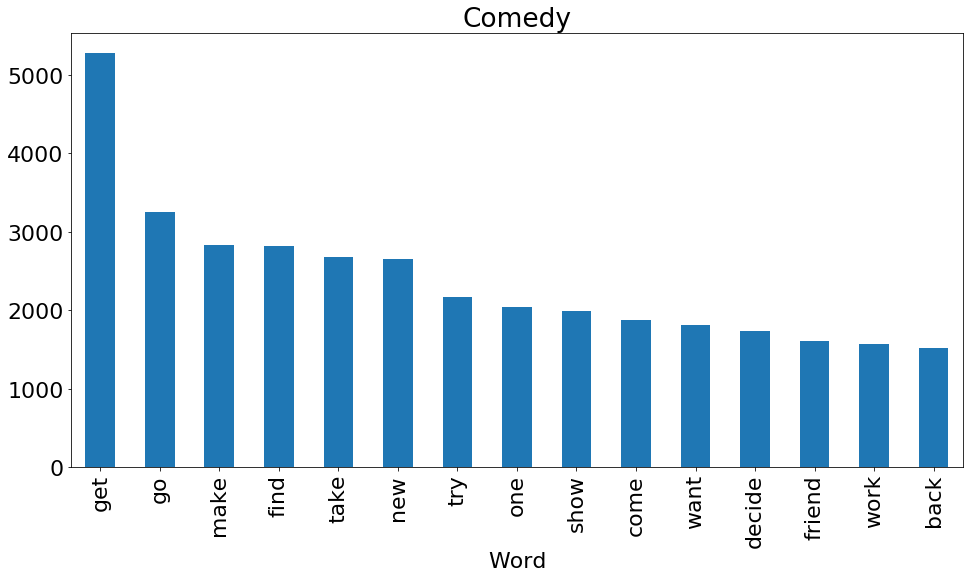

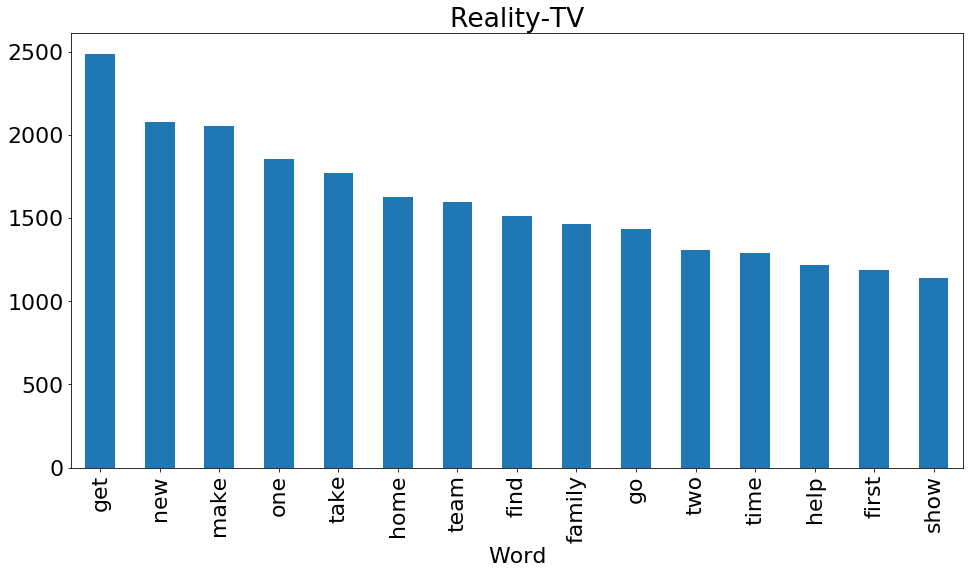

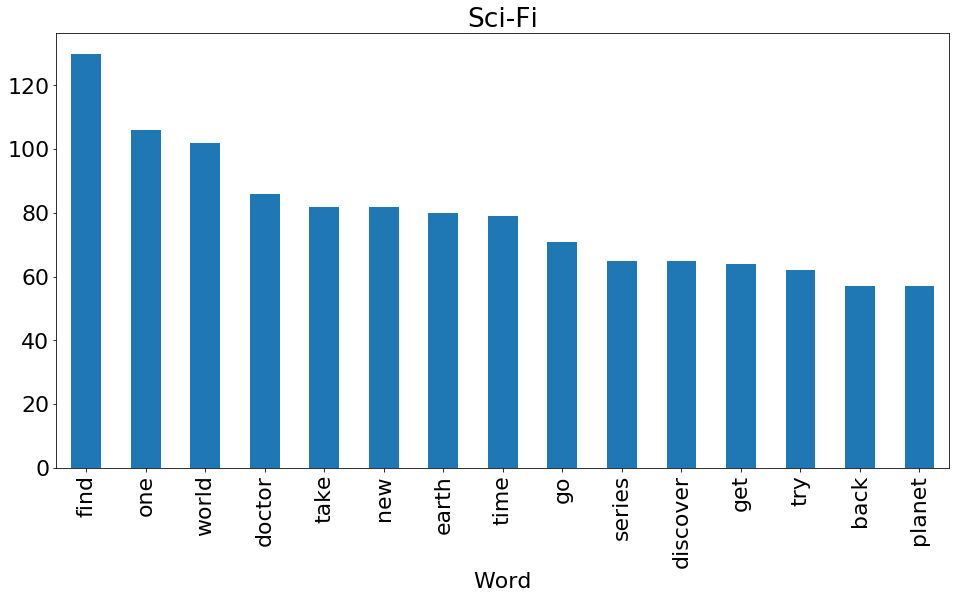

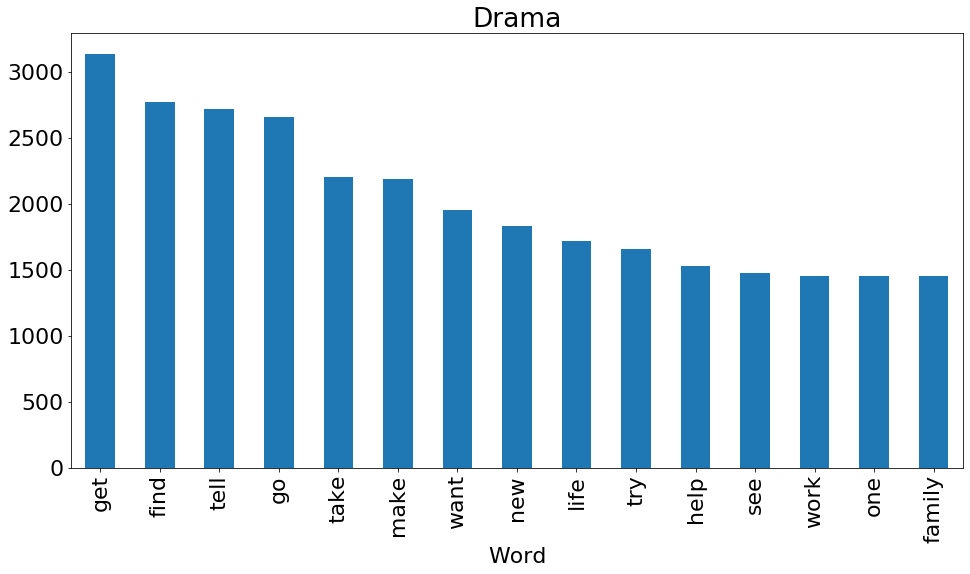

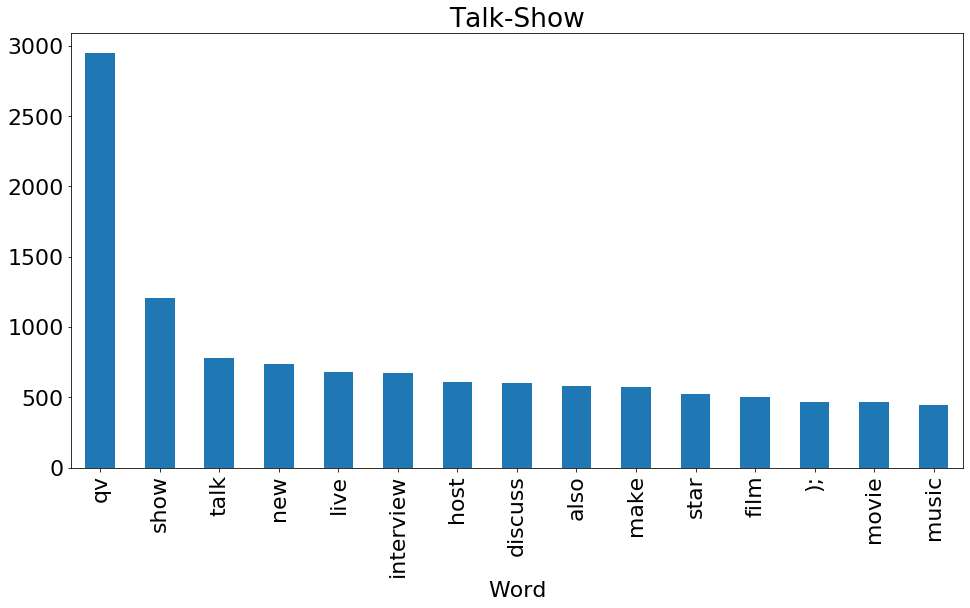

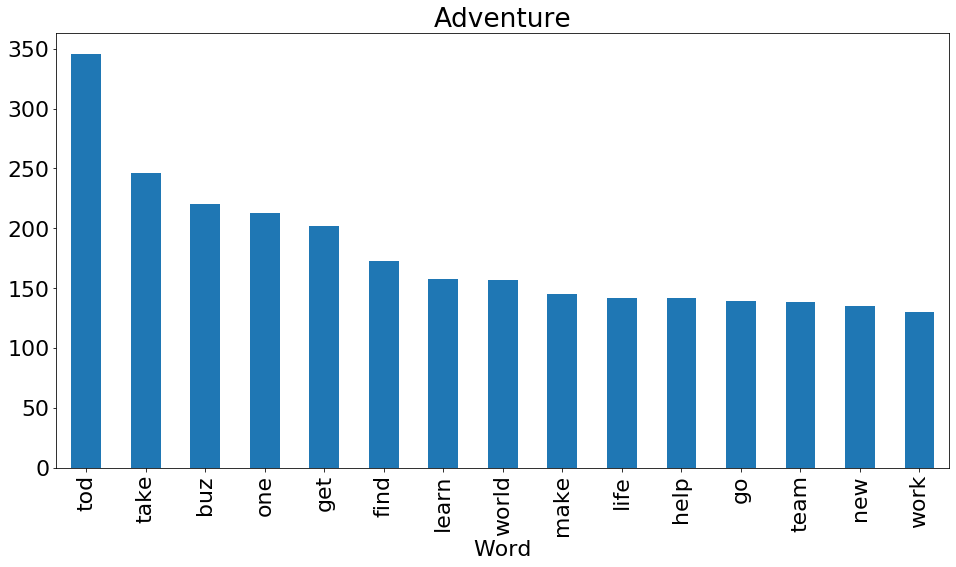

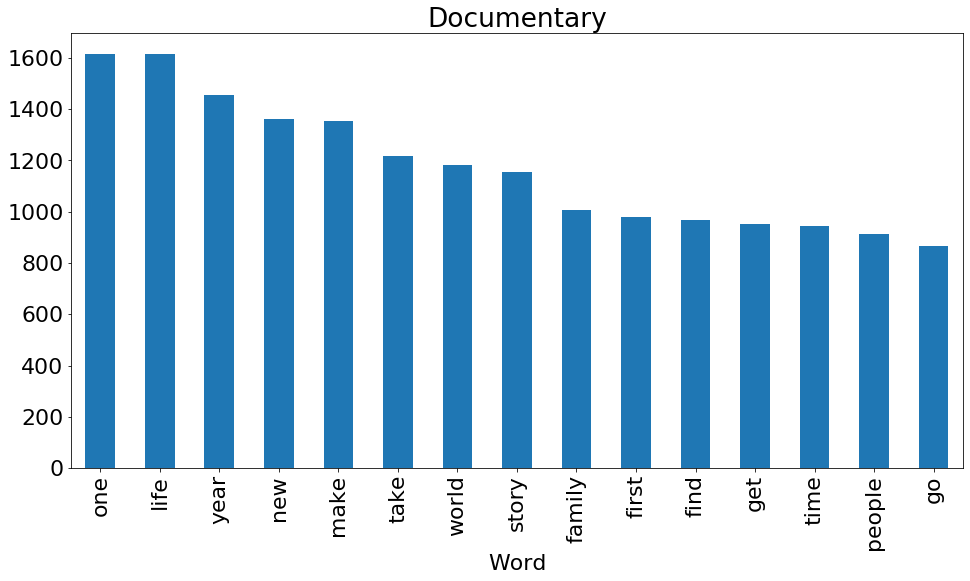

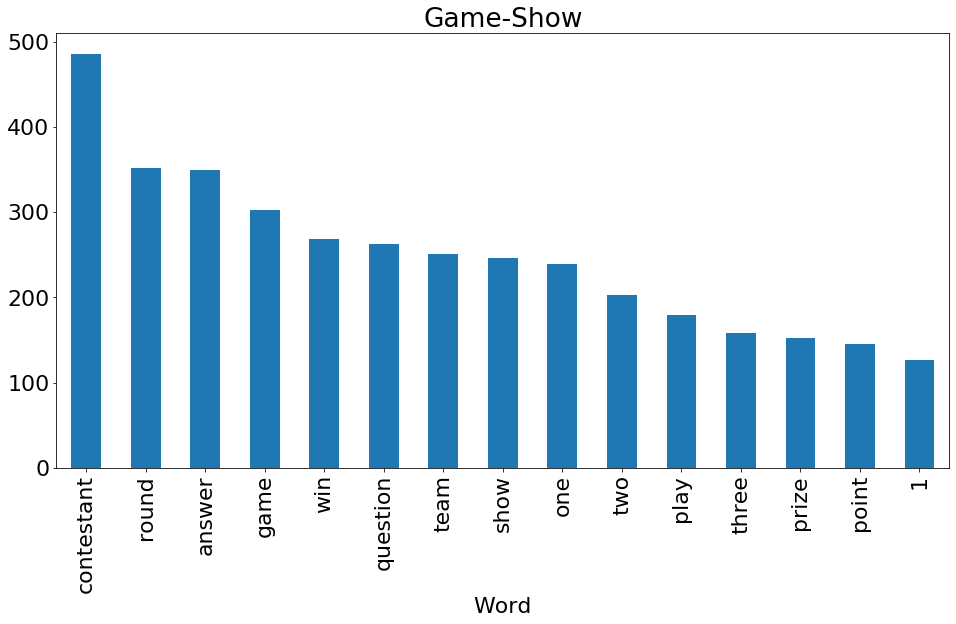

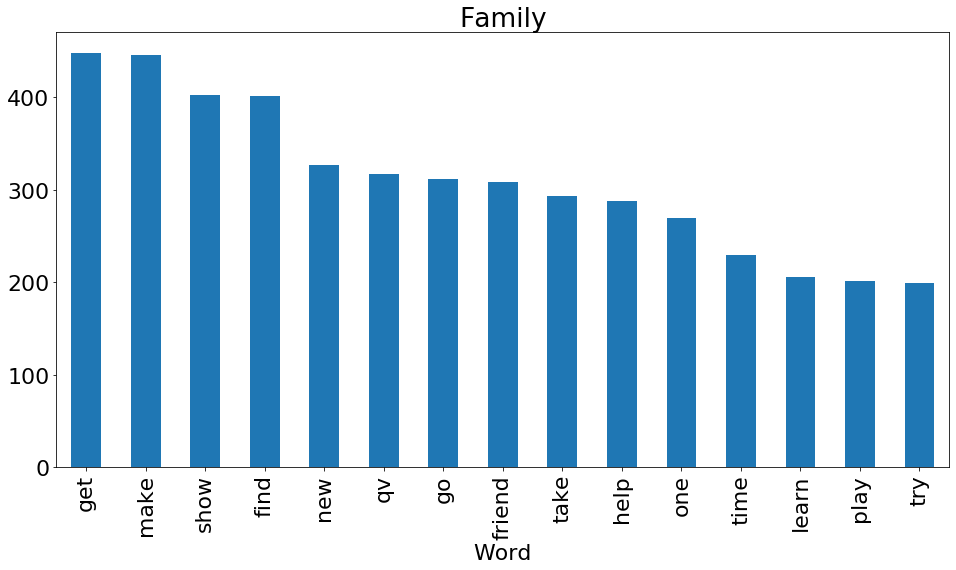

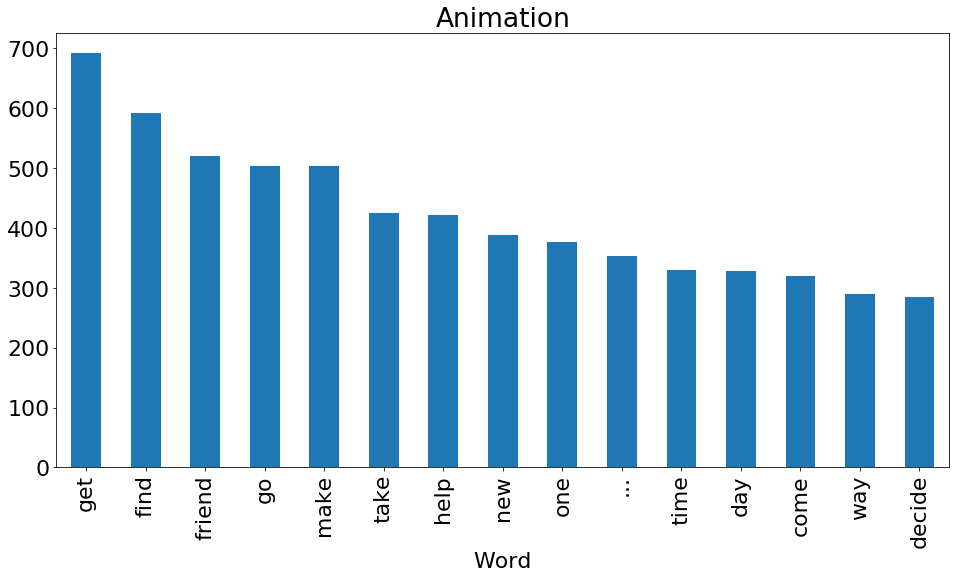

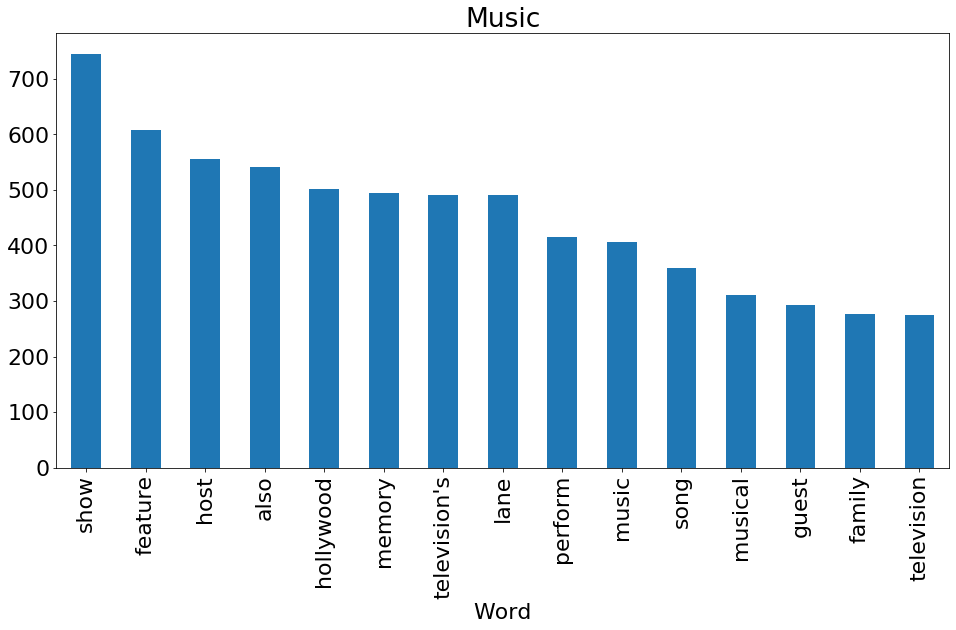

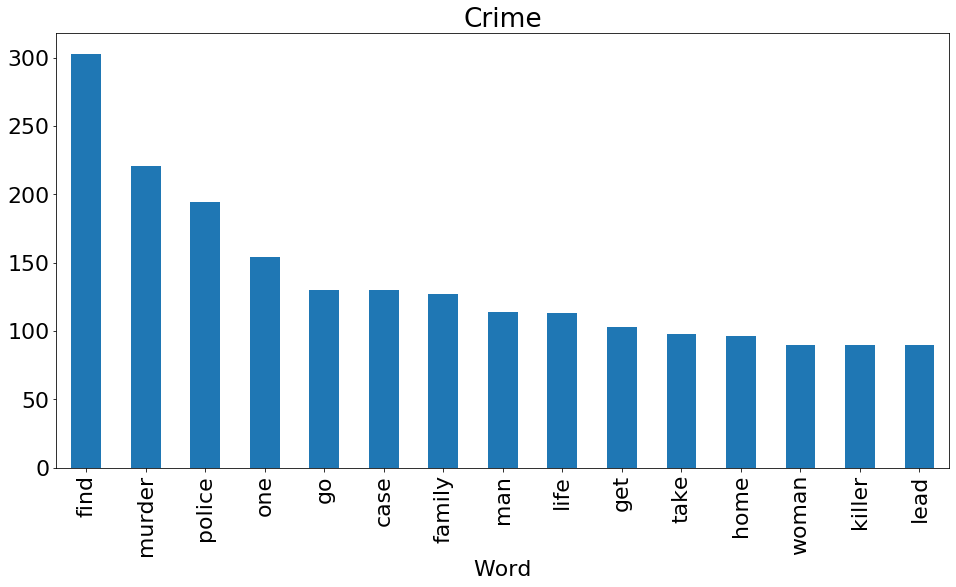

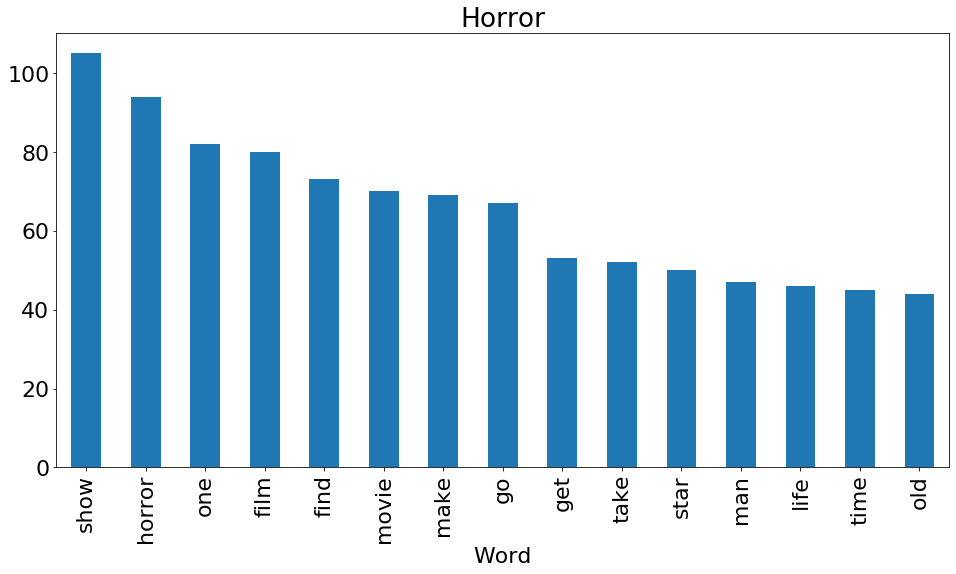

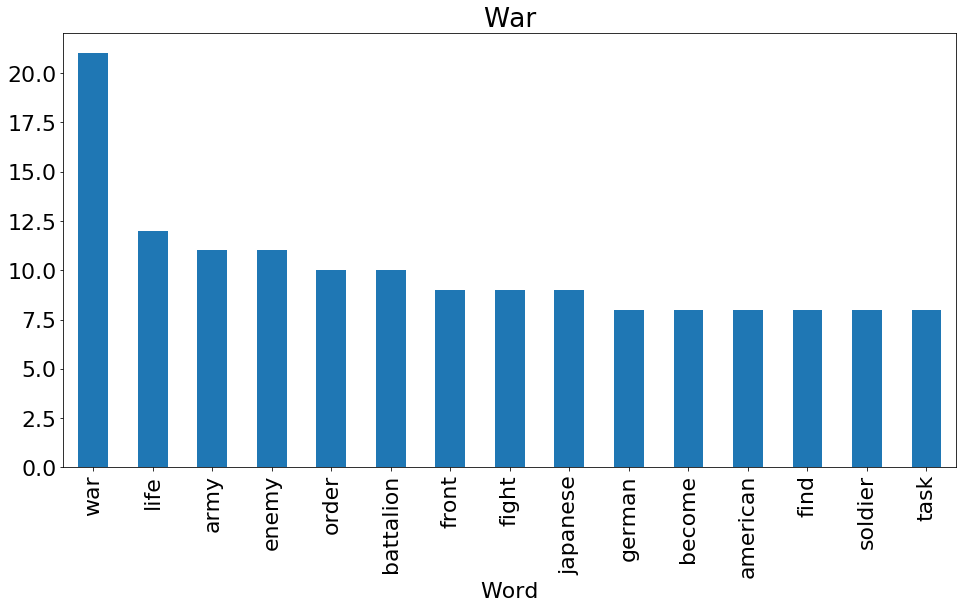

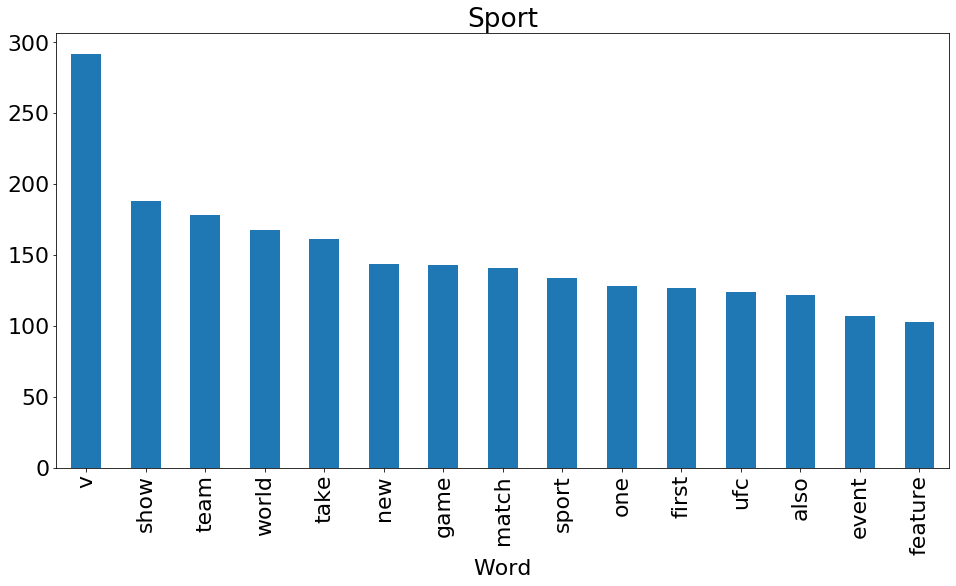

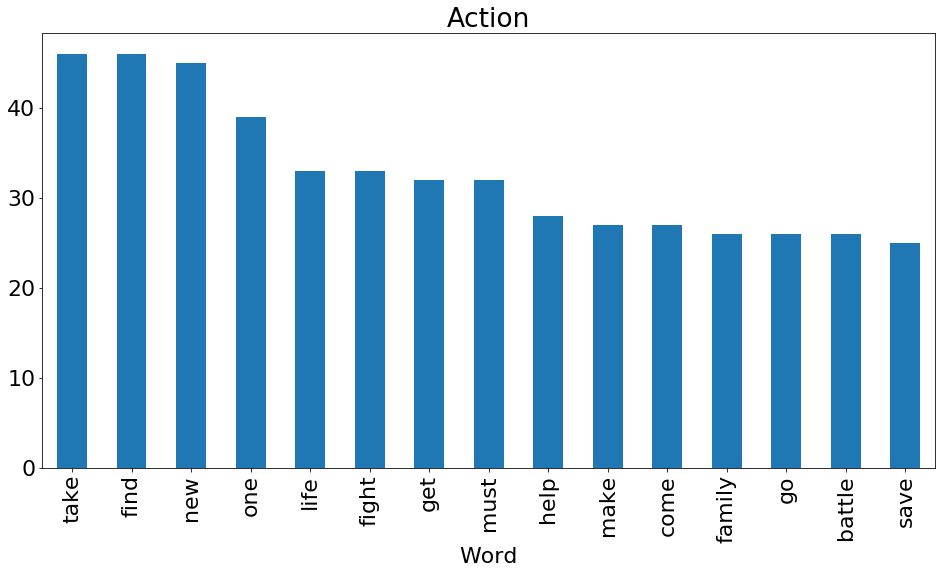

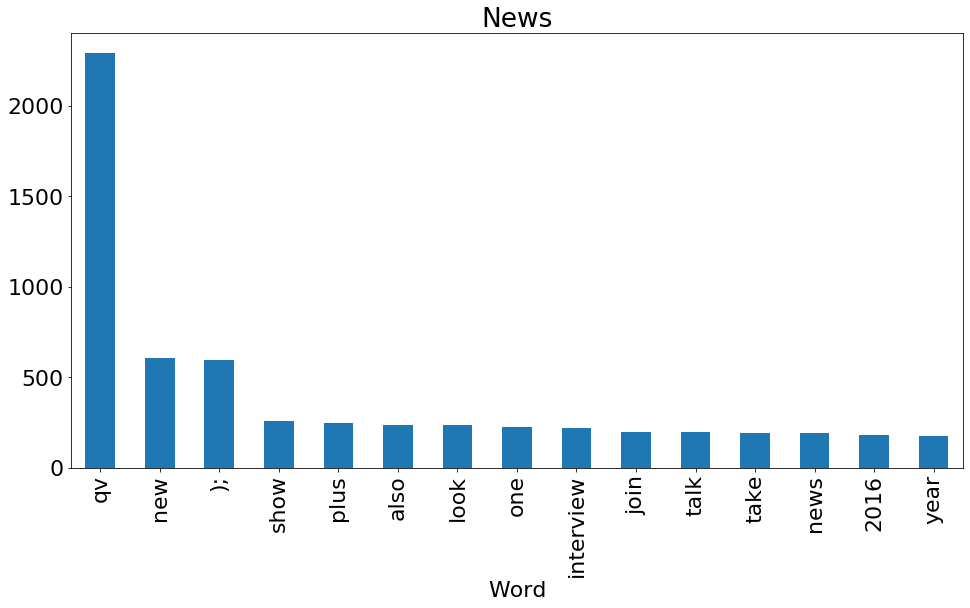

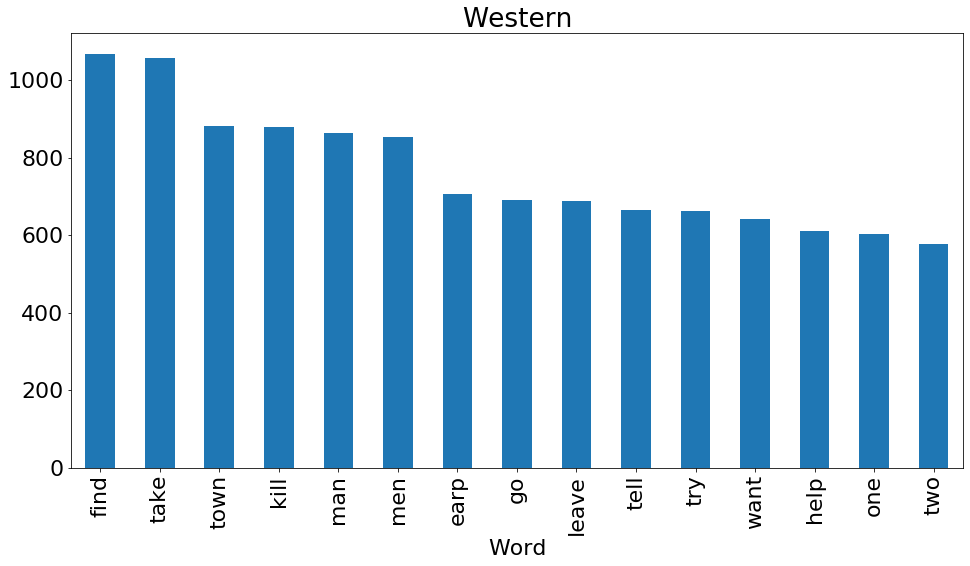

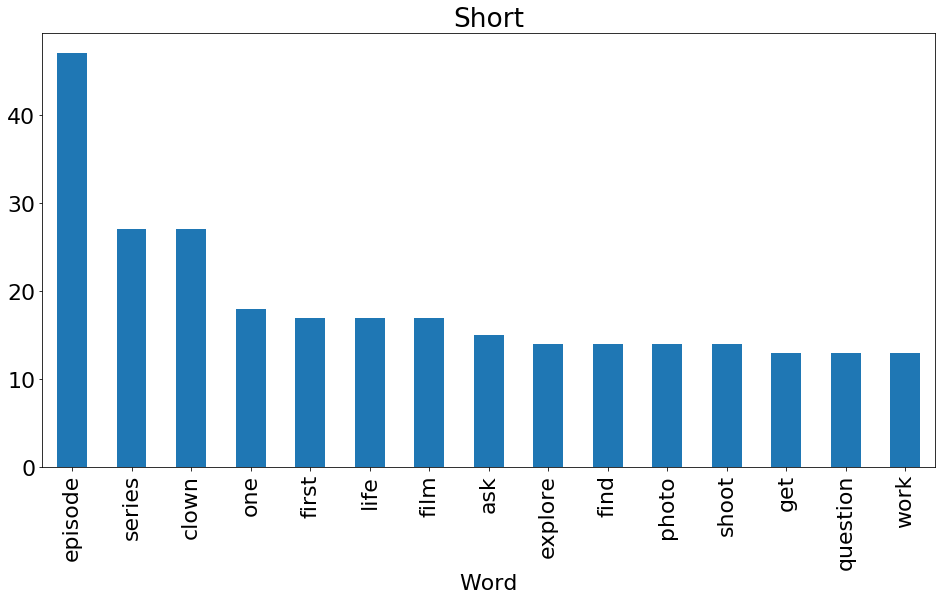

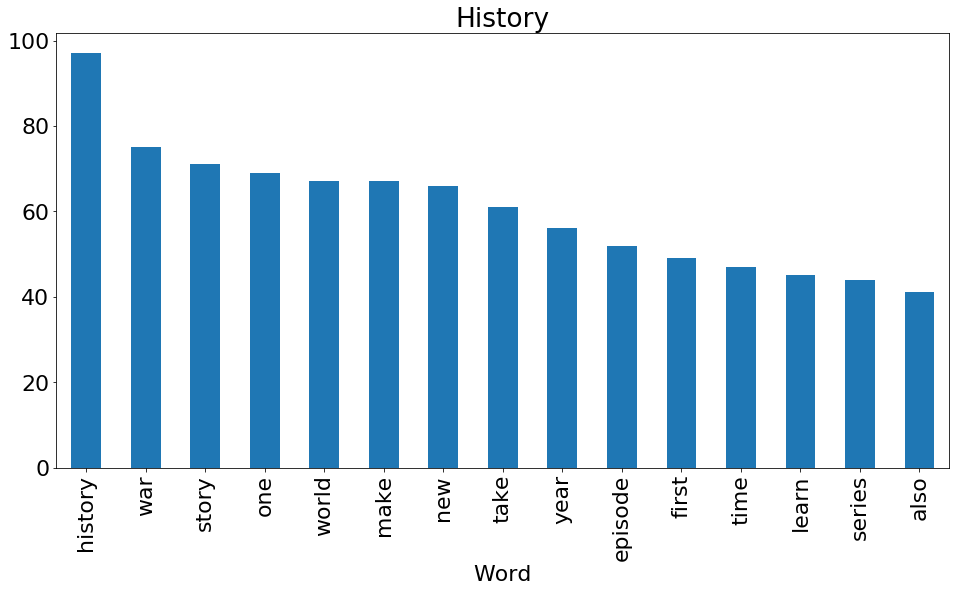

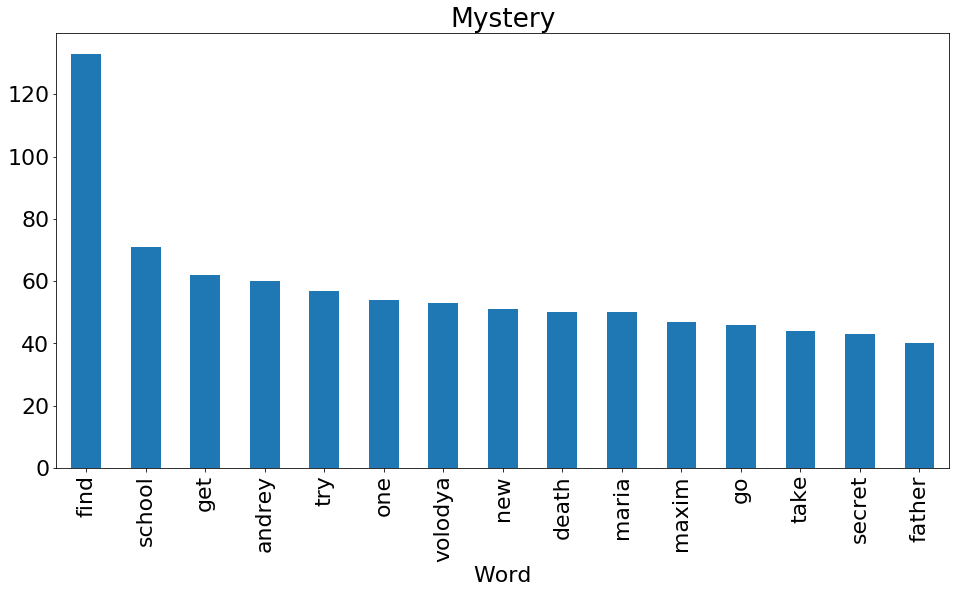

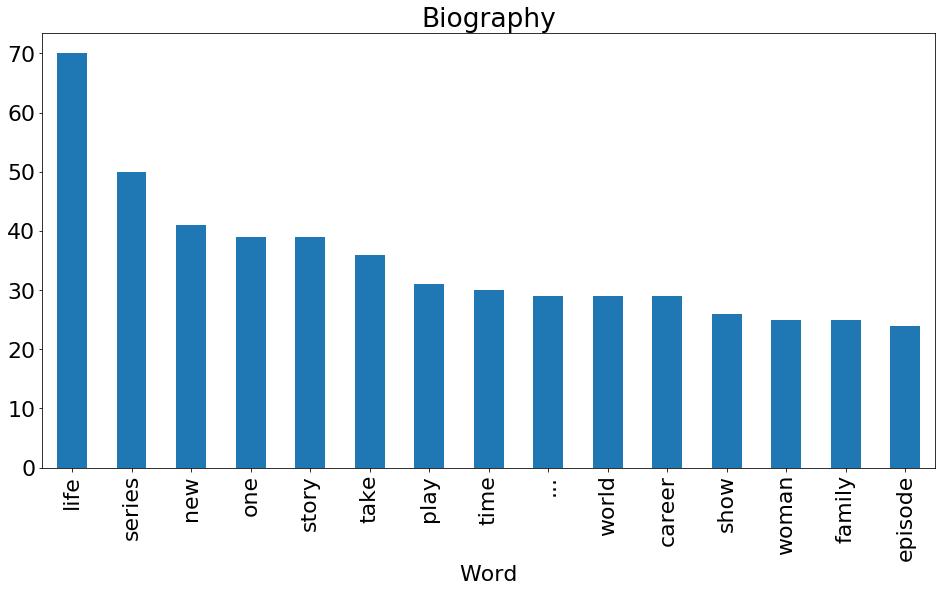

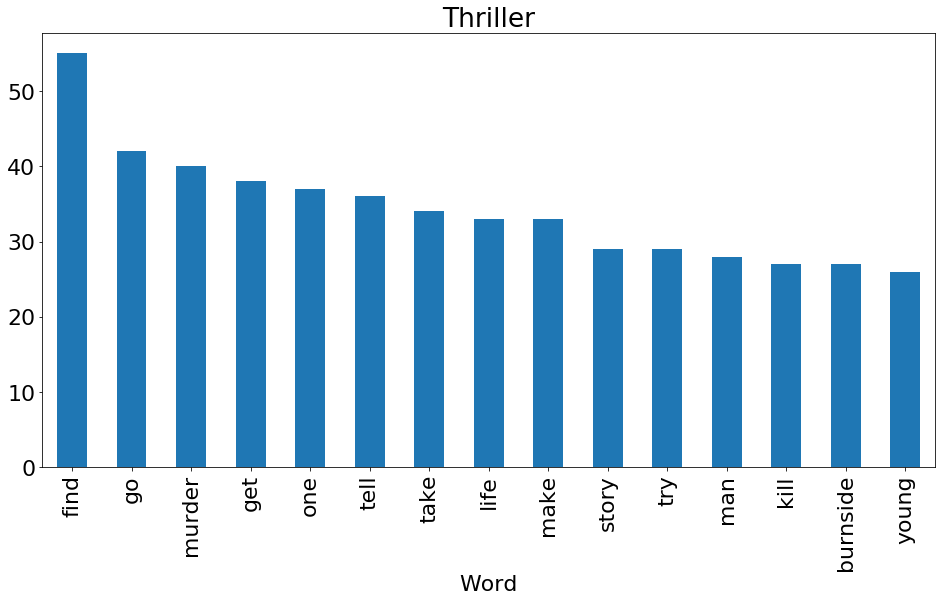

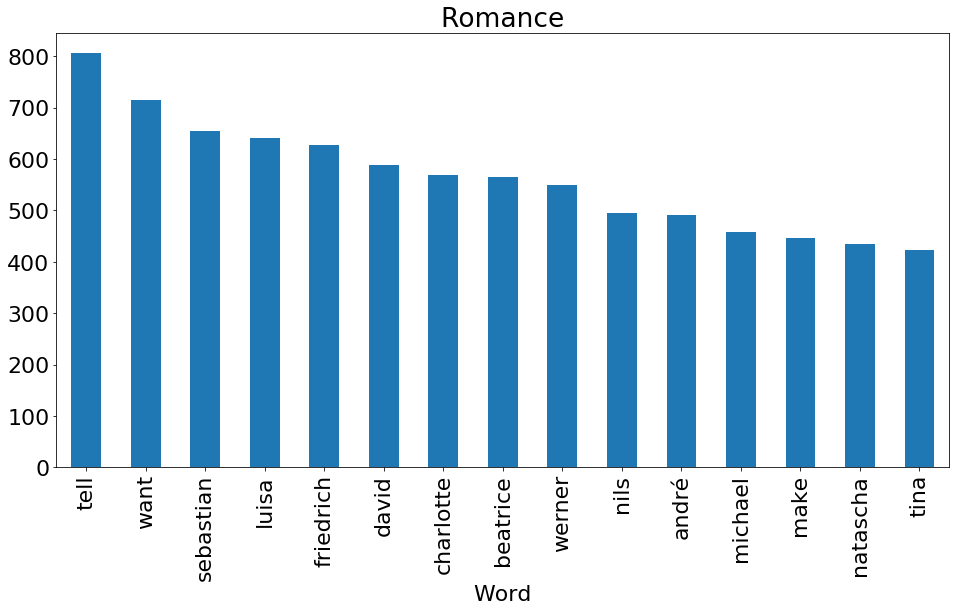

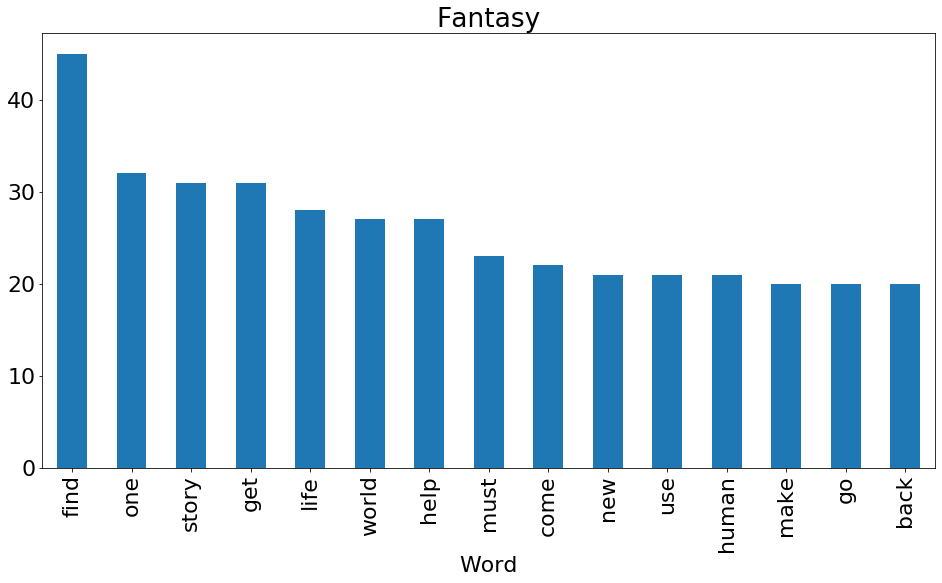

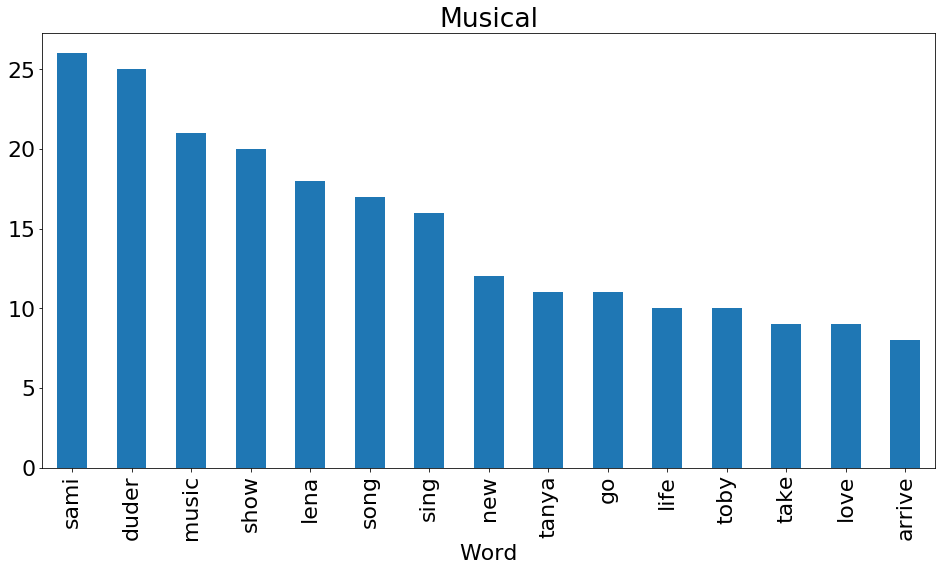

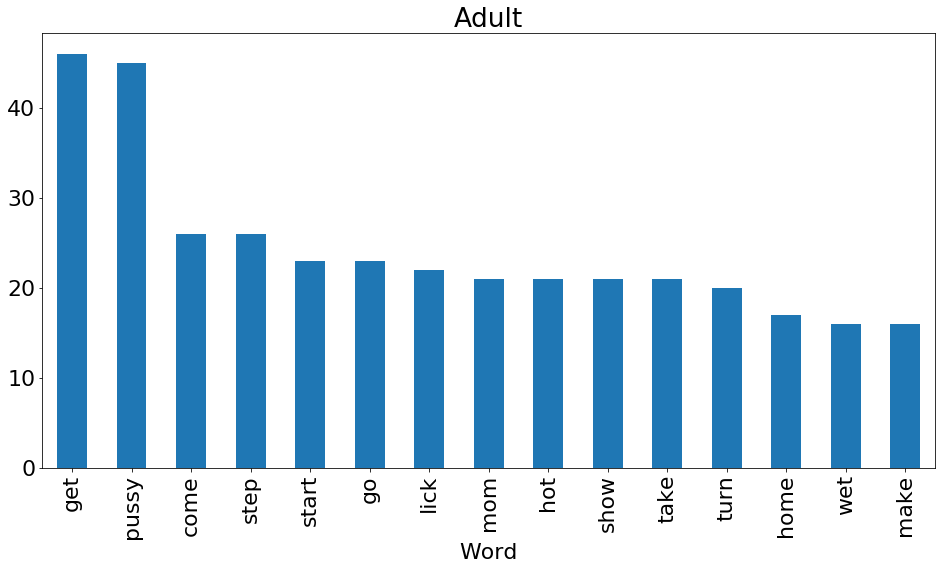

In [55]:
from nltk.probability import FreqDist
import matplotlib
from matplotlib import pyplot as plt

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

# Iterate through each movie and get the most common words. Maybe plot them?
for movie in movies['Genre'].unique():
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    
    matplotlib.rcParams.update({'font.size': 22})
    
    df = pd.DataFrame(fdist.most_common(15),columns=['Word','Count'])
    df.plot(x='Word', y='Count', kind='bar', legend=False, figsize=(16,8))
    
    plt.title(movie)
    plt.show()

We now have a count of the most common words in each genre.

# Sentiment Analysis

We will now look at how positive or negative each plot is.

Using textblob, we are calculating the sentiment polarity of each plot, each of which will lie in the range of [1,-1] where 1 means positive sentiment and -1 means a negative sentiment.

In [47]:
#pip install -U textblob
from textblob import TextBlob

movies['polarity'] = movies['plot'].map(lambda text: TextBlob(text).sentiment.polarity)
movies['plot_len'] = movies['plot'].astype(str).apply(len)

print('5 random Plots with the highest positive sentiment polarity:\n')
pl = movies.loc[movies.polarity == 1, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')
    #Only this one takes about 5-15 mins depending on computer

5 random Plots with the highest positive sentiment polarity:

 Anna Wintour, the legendary editor of Vogue magazine, oversees a competition in which 10 designers get a chance to work alongside industry luminaries to prove they have what it takes to be named Fashion Fund Designer of the Year - an award that comes with $400,000 and a one-year mentorship with some of the biggest names in fashion. 

 Robert takes on a two-in-one challenge, when he travels to Downers Grove, Illinois, to fix a grocery store with a full-service bistro, owned by two best friends who are failing at both sides of the business, causing their relationship to deteriorate as well. 

 Prince Mario-Max Schaumburg-Lippe explains which Royals create, sell or endorse Royal products. There is a wonderful organic line of Prince Charles Windsor, the Prince of Wales, the Royal Palace store of Sweden, Queen Silvia and King Carl Gustaf Bernadotte, has cuff links and Princess Märtha Louise of Norway writes Angel-Books. 

 Tim S

In [48]:
print('5 random Plots with the most neutral sentiment polarity(0):\n')
pl = movies.loc[movies.polarity == 0, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')

5 random Plots with the most neutral sentiment polarity(0):

 Jesse and Gaston invite the guys for a karaoke night, while Susie babysits M'Beku in the Prototype Room. Mr G and Alex, drinking after hours, mistakenly think Susie is an intruder and stage a drunken attack on the Prototype room to defend the company. 

 Highlights of this episode include: a look of heroes through the ages; a Hill's Angels photocall, "The Seven Foolish Virgins - Well, Six Anyway"; suitcases come to life and attack passersby; a Kabaret with Otto Schtuk; a silent routine with Sue Upton playing Stan Laurel to Benny's Oliver Hardy; Chow Mein as a waiter in a fancy house; and an ending sketch with a jungle explorer eluding natives seeking to cook him for dinner. 

 Maude discovers that her husband doesn't want the baby but thought she does. The episode concludes with their decision that, given their ages, they should not become parents of a newborn, and that Maude will choose abortion. 

 Winter's grip on McCarth

In [49]:
print('2 random Plots with the most negative polarity: \n')
pl = movies.loc[movies.polarity == -1, ['plot']].sample(2).values
for p in pl:
    print(pl[0],'\n')

2 random Plots with the most negative polarity: 

[' Connie is questioned over the murder of Alfred Maxwell, but things take a nasty turn as Connie tells the police to investigate her office, which she claims has the medication she gave to Alfred. Just minutes before the police arrive Rita snatches the medication - leading to Connie being charged for murder. Lofty and Robyn argue as he kisses another patient.'] 

[' Connie is questioned over the murder of Alfred Maxwell, but things take a nasty turn as Connie tells the police to investigate her office, which she claims has the medication she gave to Alfred. Just minutes before the police arrive Rita snatches the medication - leading to Connie being charged for murder. Lofty and Robyn argue as he kisses another patient.'] 



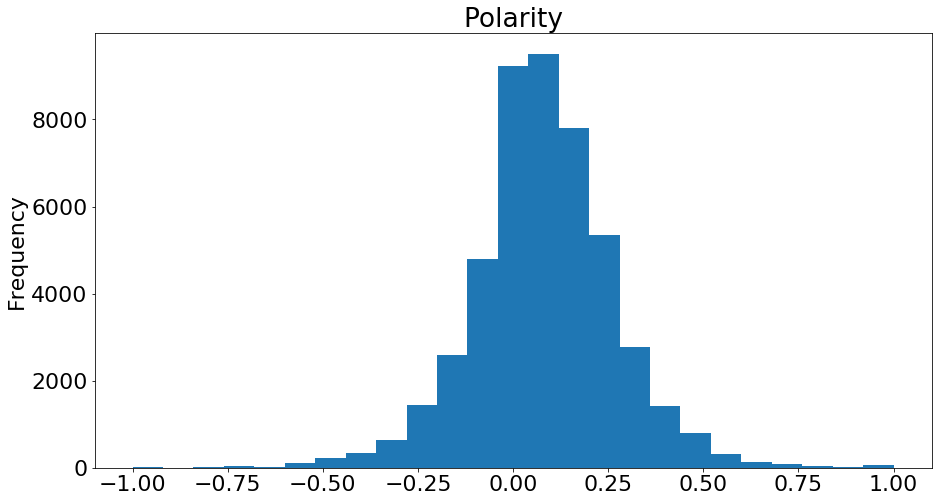

In [56]:
movies['polarity'].plot(
    kind='hist',
    bins = 25,
    legend=False, 
    figsize=(15,8))

plt.title('Polarity')

plt.show()

Vast majority of the sentiment polarity scores are hovering between -0.25 and 0.25, meaning that most of the plots in the database are more neutral sided. It is safe to say that there are more positive plots and negative plots base on the graph above. As you can see the more we more towards 1 or -1 the less amount of plots we get that have a ploarity score of 1 and -1.

Get the average sentiment for each genre, and plot it. This will show us if different Genres tend to display different sentiments.

In [79]:
movie_counts_df

,Genre,Count,Avg Polarity
Short,NaN,NaN,0.195413
Talk-Show,NaN,NaN,0.14018
Sport,NaN,NaN,0.139772
Music,NaN,NaN,0.134692
Musical,NaN,NaN,0.120769
Biography,NaN,NaN,0.117562
Family,NaN,NaN,0.113502
News,NaN,NaN,0.112804
Adult,NaN,NaN,0.110845
History,NaN,NaN,0.106066


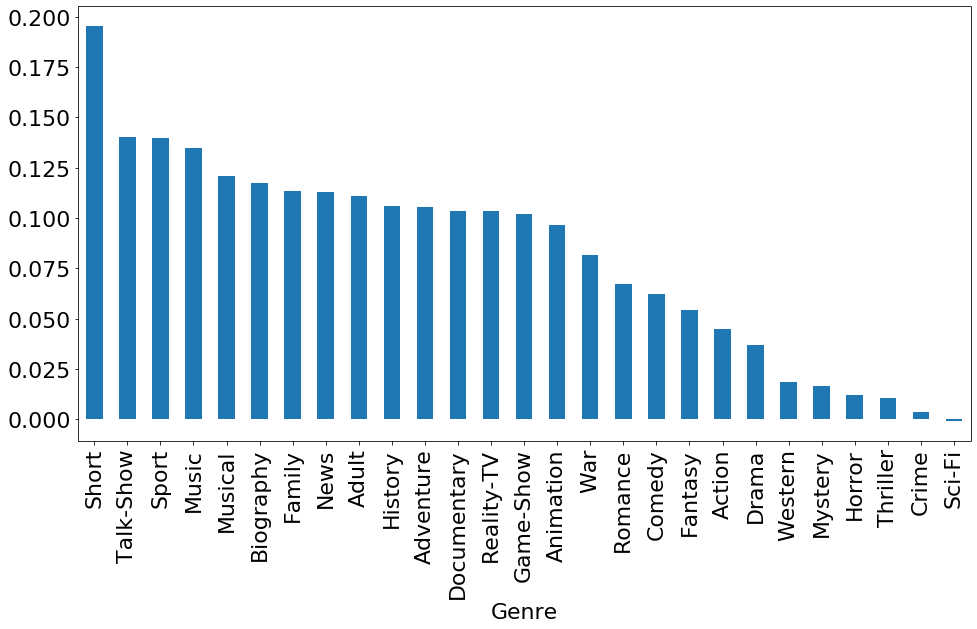

In [81]:
movie_counts_df = movies['Genre'].value_counts().to_frame()

movie_counts_df['Avg Polarity'] = None

movie_counts_df = movie_counts_df.reset_index()

movie_counts_df = movie_counts_df.rename(columns={'Genre':'Count', 'index':'Genre'})

for idx, movie in enumerate(movie_counts_df['Genre']):
    movie_counts_df.loc[idx,'Avg Polarity'] = movies[movies[movie] == 1]['polarity'].mean()

movie_counts_df = movie_counts_df.sort_values('Avg Polarity', ascending=False)
movie_counts_df.plot(x='Genre', y='Avg Polarity', kind='bar', legend=False, figsize= (16,8))

Films are generally more positive than not, but some genres have more positive sentiment than others.

Talk-Shows and Shorts generally have really positive plots while Crimes and Thrillers tend to have more negative plots.

# Word Clouds
Finally, we wil build word clouds for the frequency of each word. This is useful as people can quickly take a glance at a word cloud to see which words are the most popular for a given genre.

In [ ]:
from wordcloud import WordCloud

for movie in movie_counts_df['Genre']:
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    df = pd.DataFrame(fdist.most_common(100),columns=['Word','Count'])
    wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(df['Word'].to_string()) 
    plt.title(movie)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

# Preparing data for Modeling
We will not put labels to each dataset and split them into "training" and "testing". We will have half of each genre be used for training, and the other half be used for testing.

In [91]:
movie_counts_df = movie_counts_df[movie_counts_df['Genre'] != 'Lifestyle']

# Create a dictionary of data mapped to Genre
data_dict = {}
for movie in movie_counts_df['Genre']:

    clean_plot_list = []
    for plot_tokens in movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist():
        clean_plot_list += [" ".join(plot_tokens)]
        
    data_dict[movie] = (clean_plot_list, movies['polarity'].tolist())
    

# Split data set up.
train_data = []
test_data = []

train_sentiment = []
test_sentiment = []

Y_train = []
Y_test = []

# We will have the training set and the testing set be the same size.
for movie in data_dict:
    cut = int(len(data_dict[movie][0])//2)
    end_cut = cut + cut

    train_data += data_dict[movie][0][:cut]
    test_data += data_dict[movie][0][cut:end_cut]
                                   
    train_sentiment += data_dict[movie][1][:cut]
    test_sentiment += data_dict[movie][1][cut:end_cut]
    
    # Grab the Training and Testing data
    Y_train += [movie] * len(data_dict[movie][1][:cut])
    Y_test += [movie] * len(data_dict[movie][1][cut:end_cut])
    
Y_train = pd.Series(Y_train)
Y_test = pd.Series(Y_test)

print("Length of Training Set: ", len(train_data))
print("Length of Testing Set: ", len(test_data))

Length of Training Set:  23890
Length of Testing Set:  23890


# Vectorizing for TfidfVectorizer


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
vectorizer = TfidfVectorizer(max_features=100, max_df=0.5, ngram_range=(1,3))
vectorizer.fit(train_data)

# Map indicies to word
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}

# Transform the Training and Testing data
X_train = vectorizer.transform(train_data).toarray()
X_test = vectorizer.transform(test_data).toarray()

# Convert To DataFrame
X_train = pd.DataFrame(X_train)
X_train = X_train.rename(columns = inv_map)
# Add sentiment score
X_train = pd.concat([X_train, pd.DataFrame(train_sentiment)], axis=1)
X_train = X_train.rename(columns={0:"Sentiment Score"})

# Convert To DataFrame
X_test = pd.DataFrame(X_test)
X_test = X_test.rename(columns = inv_map)
# Add sentiment score
X_test = pd.concat([X_test, pd.DataFrame(test_sentiment)], axis=1)
X_test = X_test.rename(columns={0:"Sentiment Score"})

In [86]:
X_train.head()

,also,another,ask,back,become,best,big,bring,call,child,city,come,day,decide,discover,end,episode,even,face,family,father,find,first,friend,get,girl,give,go,good,he,head,help,high,home,host,house,however,include,job,keep,know,late,lead,learn,leave,life,like,live,look,love,make,man,meanwhile,meet,mother,move,must,need,new,night,old,one,party,people,plan,play,put,qv,return,run,school,see,series,set,show,son,start,story,take,talk,team,tell,think,three,time,town,try,turn,two,use,visit,want,way,well,wife,woman,work,world,year,young,Sentiment Score
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48388,0.182709,0.391626,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141397,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206337,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.153645,0.0,0.0,0.207048,0.0,0.0,0.0,0.0,0.318464,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.223721,0.000000,0.0,0.0,0.0,0.217112,0.0,0.0,0.223432,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.407854,0.187586,0.0,0.008333
1,0.0,0.0,0.444241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.103657,0.754475,0.0,0.0,0.0,0.0,0.0,0.189067,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.088094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100265,0.0,0.0,0.000000,0.0,0.086587,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.077375,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.326137,0.112289,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.089378,0.0,0.0,0.0,0.0,0.094387,0.099688,0.0,0.0,0.0,0.000000,0.099094,0.000000,0.0,0.125000
2,0.0,0.0,0.573684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.107089,0.556751,0.0,0.0,0.0,0.0,0.0,0.195326,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103584,0.0,0.0,0.000000,0.0,0.268360,0.0,0.107141,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.079601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096355,0.336933,0.116006,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.09095,0.0,0.000000,0.0,0.0,0.0,0.0,0.097512,0.102988,0.0,0.0,0.0,0.188678,0.102374,0.000000,0.0,0.318056
3,0.0,0.0,0.531176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.123942,0.644371,0.0,0.0,0.0,0.0,0.0,0.226066,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119886,0.0,0.0,0.000000,0.0,0.103531,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.389960,0.134263,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.112858,0.119196,0.0,0.0,0.0,0.000000,0.118486,0.000000,0.0,-0.046296
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.393838,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.190408,0.0,0.158195,0.0,0.000000,0.0,0.0,0.136405,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.198619,0.000000,0.0,0.0,0.0,0.771003,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.362091,0.000000,0.0,0.062500


In [93]:
Y_train.head()

0    Short
1    Short
2    Short
3    Short
4    Short
dtype: object

# Build Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def test_model(model_choice, params, model_name, X_train, y_train):
    """Trains model, and evaluates it.
        PARAMS:
            model_choice - SKLearn Model: Model to be trained
            params - dictionary: Dictionary of parameters to feed the model
            X_train - DataFrame: Training Data, Features
            y_train - DataFrame: Training Data, Targets
            X_test - DataFrame: Testing Data, Features
            y_test - DataFrame: Testing Data, Targets
        
        RETURNS:
            Accuracy - float: Accuracy for specified model and parameters. 
    """
    # Run RandomizedSearch instead of GridSearch to conserve time. 
    # If Time, we can run GridSearch on the final models?
    # Really small search space. To increase, update n_iter to a higher number. 
    # To get more reliable results, increase cv to a higher number.
    clf = RandomizedSearchCV(model_choice(), params, cv=3, n_iter=5, scoring='accuracy', n_jobs=4, verbose=10)
    clf.fit(X_train, y_train)
    
    best_parameters = clf.best_params_
    best_score = clf.best_score_
    
    print(f"Accuracy for {model_name}: ", best_score)
    
    return (best_score, model_name, best_parameters)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
import xgboost as xgb

xgb_param_space = {
    'objective':['multi:softmax'],
    'max_depth': [6, 10, 15, 20],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [100]
}

gbr_param_space = {
    'learning_rate':[0.01,0.1],
    'n_estimators':[50,100,150],
    'subsample':[0.5,0.7,1.0],
    'max_depth':[3,6],
    'alpha':[0.7,0.9]
}

svm_param_space = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[3,4,5,6],
    'tol': [0.0001, 0.001, 0.01],
    'C':[0.8, 0.9, 1.0]
}

models_to_test = [
    (xgb.XGBClassifier, xgb_param_space, "XGBoost"),
    (svm.SVR, svm_param_space, "Support Vector Machine"),
    (GradientBoostingRegressor, gbr_param_space, "GradientBoostingRegressor")
]

results = []

for model in models_to_test:
    results += [test_model(model[0], model[1], model[2], X_train, Y_train)]
    
# Sort results by the best rmse.
results.sort(key = lambda x: x[0])

In [ ]:
def preprocess_pipeline(plot_str):
    """Pass in a plot and get out the vectorized form of it"""
    plot_str = remove_noise(plot_str)
    
    # Get sentiment score
    
    # Convert to vectorized form
    return vectorizer.transform([plot_str]).toarray()